## Remove Duplicates

In [2]:
import pandas as pd

# Load the uploaded dataset to examine its structure and contents
file_path = 'diabetes_data.csv'
diabetes_data = pd.read_csv(file_path)

# Display the first few rows and column information for analysis
diabetes_data_info = diabetes_data.info()
diabetes_data_head = diabetes_data.head()

diabetes_data_info, diabetes_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                             --------------  ----- 
 0   age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class  520 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB


(None,
   age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class
 0              40;Male;0;1;0;1;0;0;0;1;0;1;0;1;1;1;1                                                                                                                                               
 1              58;Male;0;0;0;1;0;0;1;0;0;0;1;0;1;0;1                                                                                                                                               
 2              41;Male;1;0;0;1;1;0;0;1;0;1;0;1;1;0;1                                                                                                                                               
 3              45;Male;0;0;1;1;1;1;0;1;0;1;0;0;0;0;1                                                                                                                                               
 4      

## Importing Libraries

In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [3]:
# Assuming your dataframe is named 'diabetes_data'
diabetes_data = diabetes_data.drop_duplicates()

# Verify that duplicates have been removed
print(f"Dataset shape after removing duplicates: {diabetes_data.shape}")


Dataset shape after removing duplicates: (251, 1)


In [4]:
# Splitting the single column into individual features based on the semicolon delimiter
diabetes_data_cleaned = diabetes_data['age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class']\
    .str.split(';', expand=True)

# Renaming columns based on the original dataset structure
diabetes_data_cleaned.columns = [
    'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class'
]

# Converting data types where appropriate
diabetes_data_cleaned['age'] = pd.to_numeric(diabetes_data_cleaned['age'], errors='coerce')
diabetes_data_cleaned['class'] = diabetes_data_cleaned['class'].astype(int)

# Displaying a summary of the cleaned data
diabetes_data_cleaned_info = diabetes_data_cleaned.info()
diabetes_data_cleaned_head = diabetes_data_cleaned.head()

diabetes_data_cleaned_info, diabetes_data_cleaned_head


<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 251 non-null    int64 
 1   gender              251 non-null    object
 2   polyuria            251 non-null    object
 3   polydipsia          251 non-null    object
 4   sudden_weight_loss  251 non-null    object
 5   weakness            251 non-null    object
 6   polyphagia          251 non-null    object
 7   genital_thrush      251 non-null    object
 8   visual_blurring     251 non-null    object
 9   itching             251 non-null    object
 10  irritability        251 non-null    object
 11  delayed_healing     251 non-null    object
 12  partial_paresis     251 non-null    object
 13  muscle_stiffness    251 non-null    object
 14  alopecia            251 non-null    object
 15  obesity             251 non-null    object
 16  class               251 non-nul

(None,
    age gender polyuria polydipsia sudden_weight_loss weakness polyphagia  \
 0   40   Male        0          1                  0        1          0   
 1   58   Male        0          0                  0        1          0   
 2   41   Male        1          0                  0        1          1   
 3   45   Male        0          0                  1        1          1   
 4   60   Male        1          1                  1        1          1   
 
   genital_thrush visual_blurring itching irritability delayed_healing  \
 0              0               0       1            0               1   
 1              0               1       0            0               0   
 2              0               0       1            0               1   
 3              1               0       1            0               1   
 4              0               1       1            1               1   
 
   partial_paresis muscle_stiffness alopecia obesity  class  
 0               0   

## PCA

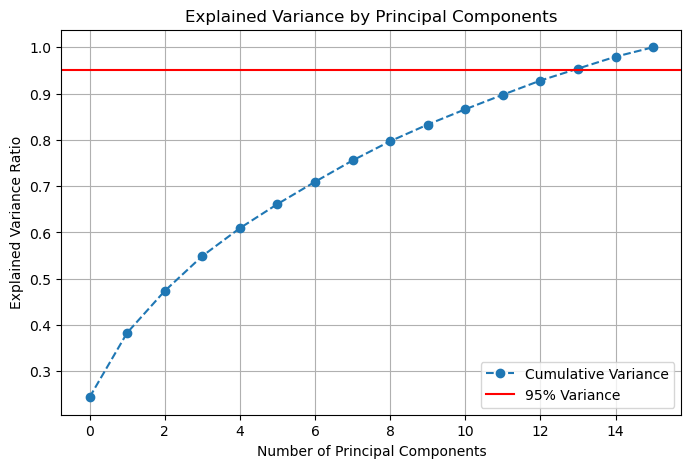

Number of components to retain 95% variance: 14

Explained Variance by Component:
Principal Component 1: 0.2442
Principal Component 2: 0.1392
Principal Component 3: 0.0903
Principal Component 4: 0.0754
Principal Component 5: 0.0602
Principal Component 6: 0.0520
Principal Component 7: 0.0481
Principal Component 8: 0.0461
Principal Component 9: 0.0415
Principal Component 10: 0.0360
Principal Component 11: 0.0330
Principal Component 12: 0.0315

Top contributing features to the first 12 principal components:
                         PC1       PC2       PC3       PC4       PC5  \
age                 0.247639  0.332163 -0.037396  0.268348 -0.139031   
gender             -0.210226  0.314712  0.183609  0.209758 -0.142707   
polyuria            0.341376 -0.176358  0.276735 -0.037978 -0.085701   
polydipsia          0.347392 -0.234118  0.162873 -0.070116  0.058947   
sudden_weight_loss  0.252097 -0.225500  0.352508 -0.072283  0.224008   
weakness            0.286994  0.124274  0.021332 -0.222908

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
# Replace 'your_dataset.csv' with the actual file path
diabetes_data = pd.read_csv('diabetes_data.csv')

# Split the single column if needed (adjust column splitting as necessary)
diabetes_data_cleaned = diabetes_data['age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class'] \
    .str.split(';', expand=True)

# Rename the columns
diabetes_data_cleaned.columns = [
    'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class'
]

# Convert data types
diabetes_data_cleaned['age'] = pd.to_numeric(diabetes_data_cleaned['age'], errors='coerce')
diabetes_data_cleaned['gender'] = diabetes_data_cleaned['gender'].map({'Male': 1, 'Female': 0})
binary_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
    'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity'
]
diabetes_data_cleaned[binary_columns] = diabetes_data_cleaned[binary_columns].astype(int)
diabetes_data_cleaned['class'] = diabetes_data_cleaned['class'].astype(int)

# Separate features and target
features = diabetes_data_cleaned.drop(columns=['class'])
target = diabetes_data_cleaned['class']

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance')
plt.legend()
plt.grid()
plt.show()

# Determine the number of components for 95% variance
num_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Number of components to retain 95% variance: {num_components_95}")

# Display explained variance for each component
print("\nExplained Variance by Component:")
for i, variance in enumerate(explained_variance_ratio[:12]):
    print(f"Principal Component {i + 1}: {variance:.4f}")

# Display the top contributing features to the first 12 principal components
pca_optimal = PCA(n_components=12)
features_reduced = pca_optimal.fit_transform(features_scaled)

# Get the component loadings (contributions of original features)
loadings = pca_optimal.components_

# Create a DataFrame for easy visualization
feature_names = features.columns
loadings_df = pd.DataFrame(loadings.T, index=feature_names, columns=[f'PC{i+1}' for i in range(12)])

print("\nTop contributing features to the first 12 principal components:")
print(loadings_df)

# Optionally, to see the absolute contributions and sort them
for i in range(12):
    print(f"\nTop features contributing to PC{i+1}:")
    top_features = loadings_df[f'PC{i+1}'].abs().sort_values(ascending=False).head(5)
    print(top_features)


 ### WHY PCA IS NOT REQUIRED
1. Categorical Features: PCA is not suitable for categorical data unless it's properly encoded (e.g., one-hot encoding or label encoding).

2. Linear Assumption: PCA assumes linear relationships between features, so it may not perform well if your data has non-linear relationships.

3. Variance Preservation: PCA focuses on maximizing variance, which might lead to the loss of important features for classification if they do not exhibit high variance.

4. Scaling Sensitivity: PCA is sensitive to the scale of features, so you need to standardize or normalize your data to ensure fair comparison across features.

## Logistic Regression model

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the dataset
data = 'diabetes_data.csv'  # Replace with your file path
diabetes_data = pd.read_csv(data)

# Split the single column into multiple columns based on the semicolon delimiter
diabetes_data_cleaned = diabetes_data.iloc[:, 0].str.split(';', expand=True)

# Rename columns
columns = [
    "age", "gender", "polyuria", "polydipsia", "sudden_weight_loss", "weakness", 
    "polyphagia", "genital_thrush", "visual_blurring", "itching", "irritability", 
    "delayed_healing", "partial_paresis", "muscle_stiffness", "alopecia", "obesity", 
    "class"
]
diabetes_data_cleaned.columns = columns

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'class']:
    le = LabelEncoder()
    diabetes_data_cleaned[column] = le.fit_transform(diabetes_data_cleaned[column])
    label_encoders[column] = le

# Separate features and target
X = diabetes_data_cleaned.drop(columns=["class"])
y = diabetes_data_cleaned["class"]

# Normalize numerical features
scaler = StandardScaler()
X[['age']] = scaler.fit_transform(X[['age']])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.94
ROC-AUC Score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



## Support Vector Machine (SVM)

In [28]:
# Define the model
svm_model = SVC(probability=True, random_state=42)

# Define the hyperparameters to tune
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only used with 'poly' kernel
}

# Use GridSearchCV
svm_grid = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
svm_grid.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters for SVM:", svm_grid.best_params_)
best_svm_model = svm_grid.best_estimator_

# Evaluate the best model
svm_predictions = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, best_svm_model.predict_proba(X_test)[:, 1])
print(f"SVM Tuned Accuracy: {svm_accuracy:.2f}")
print(f"SVM Tuned ROC-AUC: {svm_roc_auc:.2f}")
print("Classification Report:\n", classification_report(y_test, svm_predictions))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters for SVM: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Tuned Accuracy: 0.97
SVM Tuned ROC-AUC: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



## Naive Bayes

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the Naive Bayes model
nb_model = GaussianNB()

# Define the hyperparameters to tune
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter to avoid zero division
}

# Set up GridSearchCV for tuning
nb_grid = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
nb_grid.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters for Naive Bayes:", nb_grid.best_params_)
best_nb_model = nb_grid.best_estimator_

# Evaluate the best model
nb_predictions = best_nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_roc_auc = roc_auc_score(y_test, best_nb_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"Naive Bayes Tuned Accuracy: {nb_accuracy:.2f}")
print(f"Naive Bayes Tuned ROC-AUC Score: {nb_roc_auc:.2f}")
print("Naive Bayes Tuned Classification Report:")
print(classification_report(y_test, nb_predictions))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
Naive Bayes Tuned Accuracy: 0.94
Naive Bayes Tuned ROC-AUC Score: 0.99
Naive Bayes Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



## k-Nearest Neighbors (k-NN)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the k-NN model
knn_model = KNeighborsClassifier()

# Define the hyperparameters to tune
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Set up GridSearchCV for tuning
knn_grid = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
knn_grid.fit(X_train, y_train)
## Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the Naive Bayes model
nb_model = GaussianNB()

# Define the hyperparameters to tune
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter to avoid zero division
}

# Set up GridSearchCV for tuning
nb_grid = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
nb_grid.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters for Naive Bayes:", nb_grid.best_params_)
best_nb_model = nb_grid.best_estimator_

# Evaluate the best model
nb_predictions = best_nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_roc_auc = roc_auc_score(y_test, best_nb_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"Naive Bayes Tuned Accuracy: {nb_accuracy:.2f}")
print(f"Naive Bayes Tuned ROC-AUC Score: {nb_roc_auc:.2f}")
print("Naive Bayes Tuned Classification Report:")
print(classification_report(y_test, nb_predictions))

# Best parameters and model evaluation
print("Best Parameters for k-NN:", knn_grid.best_params_)
best_knn_model = knn_grid.best_estimator_

# Evaluate the best model
knn_predictions = best_knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, best_knn_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"k-NN Tuned Accuracy: {knn_accuracy:.2f}")
print(f"k-NN Tuned ROC-AUC Score: {knn_roc_auc:.2f}")
print("k-NN Tuned Classification Report:")
print(classification_report(y_test, knn_predictions))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters for k-NN: {'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
k-NN Tuned Accuracy: 0.94
k-NN Tuned ROC-AUC Score: 0.98
k-NN Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



## Decision Tree Classifier

In [ ]:
# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV
dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
dt_grid.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters for Decision Tree:", dt_grid.best_params_)
best_dt_model = dt_grid.best_estimator_

# Evaluate the best model
dt_predictions = best_dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
print(f"Decision Tree Tuned Accuracy: {dt_accuracy:.2f}")
print(f"Decision Tree Tuned ROC-AUC: {dt_roc_auc:.2f}")
print("Classification Report:\n", classification_report(y_test, dt_predictions))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Tuned Accuracy: 0.99
Decision Tree Tuned ROC-AUC: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## Random Forest Classifier

In [ ]:
# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV or RandomizedSearchCV
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
rf_grid.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters for Random Forest:", rf_grid.best_params_)
best_rf_model = rf_grid.best_estimator_

# Evaluate the best model
rf_predictions = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f"Random Forest Tuned Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest Tuned ROC-AUC: {rf_roc_auc:.2f}")
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Tuned Accuracy: 1.00
Random Forest Tuned ROC-AUC: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



## Neural Network

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the MLP model
mlp_model = MLPClassifier(random_state=42, max_iter=500)

# Define the hyperparameters to tune
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],  # Different layer configurations
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'solver': ['adam', 'sgd', 'lbfgs'],  # Solvers for optimization
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedules
    'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate
}

# Set up GridSearchCV for tuning
mlp_grid = GridSearchCV(estimator=mlp_model, param_grid=mlp_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
mlp_grid.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters for Neural Network:", mlp_grid.best_params_)
best_mlp_model = mlp_grid.best_estimator_

# Evaluate the best model
mlp_predictions = best_mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test, best_mlp_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"Neural Network Tuned Accuracy: {mlp_accuracy:.2f}")
print(f"Neural Network Tuned ROC-AUC Score: {mlp_roc_auc:.2f}")
print("Neural Network Tuned Classification Report:")
print(classification_report(y_test, mlp_predictions))


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Parameters for Neural Network: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
Neural Network Tuned Accuracy: 0.99
Neural Network Tuned ROC-AUC Score: 1.00
Neural Network Tuned Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## Gradient Boosting

In [ ]:
# Define the model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters to tune
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV
gb_random = RandomizedSearchCV(estimator=gb_model, param_distributions=gb_params, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)

# Fit the random search
gb_random.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters for Gradient Boosting:", gb_random.best_params_)
best_gb_model = gb_random.best_estimator_

# Evaluate the best model
gb_predictions = best_gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_roc_auc = roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])
print(f"Gradient Boosting Tuned Accuracy: {gb_accuracy:.2f}")
print(f"Gradient Boosting Tuned ROC-AUC: {gb_roc_auc:.2f}")
print("Classification Report:\n", classification_report(y_test, gb_predictions))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}
Gradient Boosting Tuned Accuracy: 0.99
Gradient Boosting Tuned ROC-AUC: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



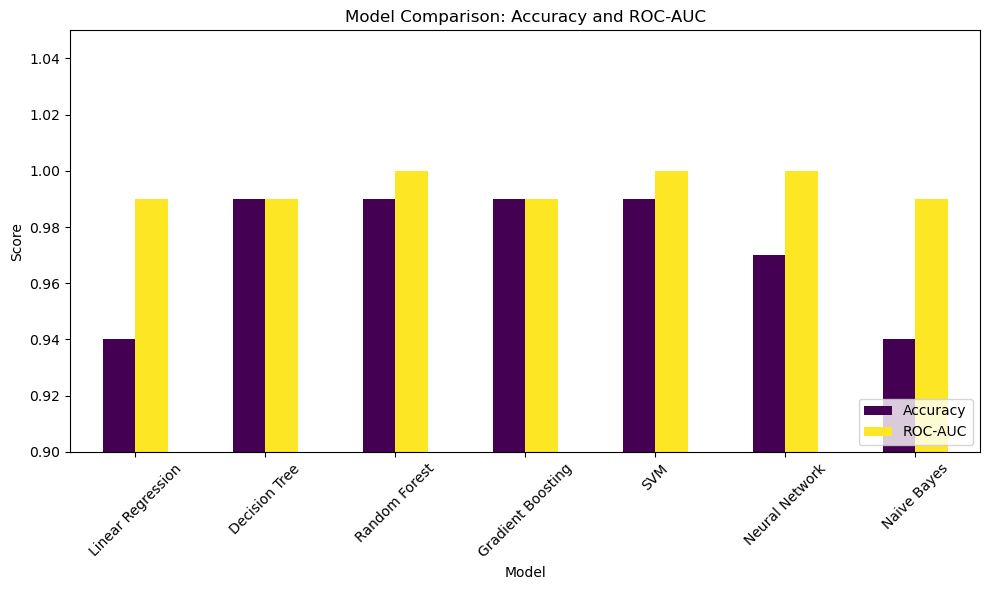

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for visualization
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network', 'Naive Bayes'],
    'Accuracy': [0.94, 0.99, 0.99, 0.99, 0.99, 0.97, 0.94],
    'ROC-AUC': [0.99, 0.99, 1.00, 0.99, 1.00, 1.00, 0.99]
}
metrics_df = pd.DataFrame(data)

# Bar plot for Accuracy and ROC-AUC
metrics_df.set_index('Model')[['Accuracy', 'ROC-AUC']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Model Comparison: Accuracy and ROC-AUC')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.05)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


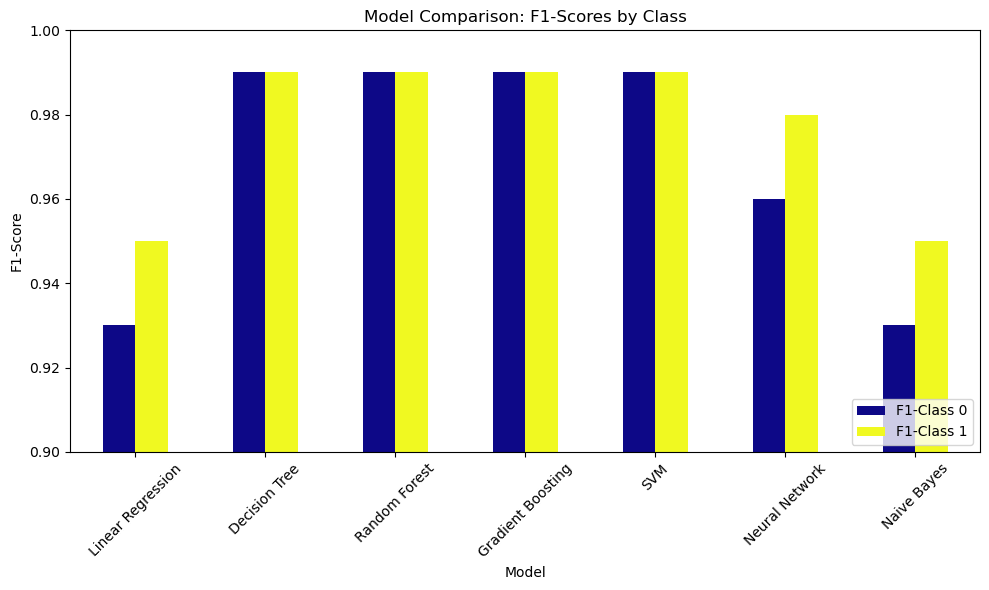

In [37]:
# Data for F1-scores
f1_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network', 'Naive Bayes'],
    'F1-Class 0': [0.93, 0.99, 0.99, 0.99, 0.99, 0.96, 0.93],
    'F1-Class 1': [0.95, 0.99, 0.99, 0.99, 0.99, 0.98, 0.95]
}
f1_df = pd.DataFrame(f1_data)

# Grouped bar plot for F1-scores
f1_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title('Model Comparison: F1-Scores by Class')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## Random Forest is likely the best fit for  data because:

1. It handles both numerical and categorical features well.
2. It can model non-linear relationships between features.
3. It is robust to outliers and noise.
4. It performs well with imbalanced datasets.
5. It reduces the risk of overfitting through ensemble learning.
6. It provides feature importance, which can be useful for understanding your data.